In [10]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

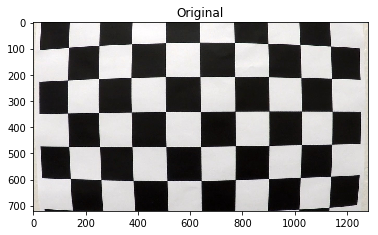

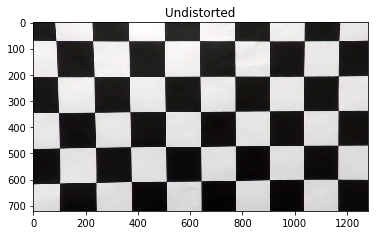

In [27]:
images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for fname in images:
    img = mpimg.imread(fname)
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

chess_dst = mpimg.imread(images[0])
chess_undst = cv2.undistort(chess_dst, mtx, dist, None, mtx)

plt.title('Original')
plt.imshow(chess_dst)
plt.show()
plt.title('Undistorted')
plt.imshow(chess_undst)
plt.show()

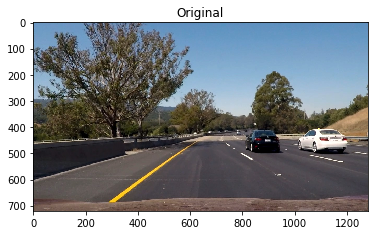

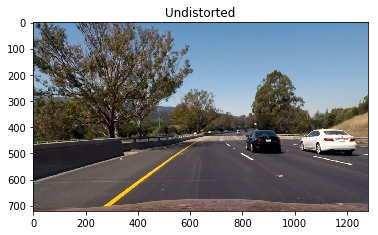

In [30]:
test_dst = mpimg.imread('test_images/test6.jpg')
test_undst = cv2.undistort(test_dst, mtx, dist, None, mtx)

plt.title('Original')
plt.imshow(test_dst)
plt.show()
plt.title('Undistorted')
plt.imshow(test_undst)
plt.show()